# CA5 Random Signal and Spectrum Estimation

In this assignment, we look at random signals and spectrum estimation.  Start with our usual imports. 

In [313]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from numpy.random import randn
from scipy.fftpack import fft, ifft
from scipy.signal import butter, lfilter
%matplotlib inline

## 1. Generate and plot a random signal

Plot the signal.  In a second plot, plot a length 100 segment of the signal with both lines and asterisks (to get a better idea of what the signal looks like).  (The `np.s_[]` function is handy for repeating a slice.)

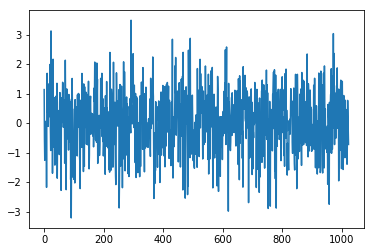

In [314]:
N = 1024
x = randn(N)
plt.plot(x)
plt.show();

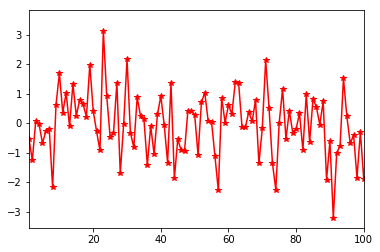

In [315]:
plt.plot(x,'r*-')
plt.xlim(1,100)
plt.show();

## 2. Calculate and plot the DFT of the signal.

As the title says, calculate the DFT and plot the magnitude of the DFT.  The signal is noisy and therefore so is the DFT.

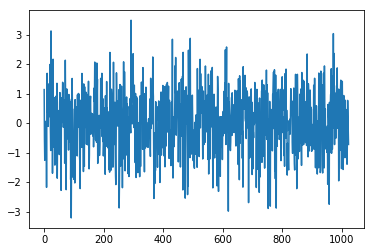

In [316]:
def DFT(x):
    x = np.asarray(x,dtype = float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape(N,1)
    X = np.exp(-2j * np.pi * k * n/N)
    return np.dot(X,x)
plt.plot(x)
plt.show();

## 3. Verify Parseval's Theorem

Parseval's theorem says
$$
\sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N}\sum_{k=0}^{N-1} |X[k]|^2
$$
Verify this for `x`.

C:\AnacondaNavigator\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


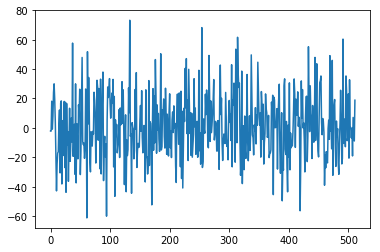

In [317]:
Fsp = 3000
Tt = 1/Fsp
def Parsevals_Theorem(wq, T, N):
    xq = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    yq = fft(wq)
    yqw = (1/N) * np.abs(yq)
    yqwe = (1/N) * np.abs(yq[0:np.int(N/2)])
    return xq, yq, yqw, yqwe


xq1, yq1, yqw1, yqwe1 = Parsevals_Theorem(x, Tt, N)
Ts_ene = sum(np.power(x, 2))* Tt
Fr_ene = sum(np.power(np.abs(yq1),2)) * N * Tt

plt.plot(yq1[0:np.int(N/2)])
plt.show();
    
    

## 4. Use the Welch Spectrum Estimator

The DFT is noisy, not surprising since the signal is pure noise.  For noisy signals the Welch estimator does a better job than the DFT.  Plot the Welch spectrum estimate.

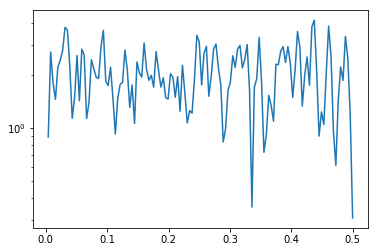

In [318]:
f, w = sig.welch(x)
plt.semilogy(f[1:], w[1:])
plt.show();

## 5. Low pass filter

Generate a lowpass signal `y` from `x` using a basic lowpass filter, e.g., length 15 and cutoff 0.25 of the Nyquist rate.  Plot `y`.  As above, plot a short segment with both asterisks and lines.  

In [319]:
Length = 15
Order = Length - 1
Fs = 30
T = 5.0
n = 1024

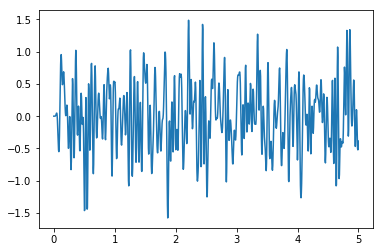

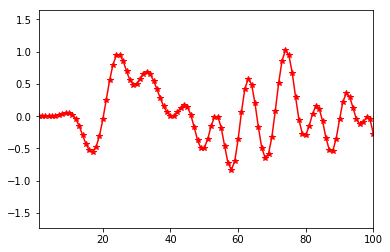

In [320]:
def lowpass(Fs, Order):
    Nyq = 0.5 * Fs
    Cutoff = 0.25 * Nyq
    Norm_cutoff = Cutoff/Nyq
    b, a =butter(Order, Norm_cutoff, btype = 'low', analog = False)
    return b,a
def butter_lowpass(data, Fs, Order):
    b, a = lowpass(Fs, Order)
    y = lfilter(b, a, data)
    return y

t = np.linspace(0, T, n, endpoint = False)
y =butter_lowpass(x, Fs, Order)

plt.plot(t,y)
plt.show();
plt.plot(y,'r*-')
plt.xlim(1,100)
plt.show();

## 6. Calculate the plot the Welch estimator for `y`

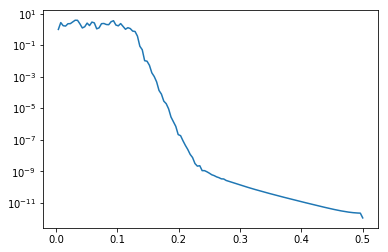

In [321]:
f, w = sig.welch(y)
plt.semilogy(f[1:], w[1:])
plt.show();

## 7. Plot the Spectrum Estimate and Filter Response on same curve

On the same axes, plot the Welch spectrum estimate of `y` and the filter's magnitude response. Use a log scale on the Y-axis.  The two curves should be close, i.e., the spectrum estimate should be close to the filter magnitude response.  (Putting noise into a filter is a traditional technique for measuring a filter's response.)

Notes: The Welch (and other spectral estimates by default only output the positive frequency half of the spectrum.  Accordingly, they multiply the spectrum estimate by 2.  However, `sig.freqz` does not multiply by 2.  Also, spectrum estimates output estimated energy, while frequency response is magnitude.

## 8. Add a sinusoid

Create a new signal `z` by adding a sinusoid to `y`.  Make sure the frequency of the sinusoid is within the passband of the filter.  Use a sinusoidal amplitude of 0.5.  Plot a segment of `z`.

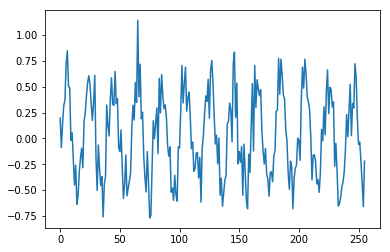

In [322]:
N = 256
f = 0.05
a = 0.5
sigma = 0.2
y = np.arange(N)
z = a*np.sin(2*np.pi*y*f)+ sigma*np.random.randn(N)
plt.plot(y, z)

## 9. Plot Spectrum Estimate of Sinusoid With Noise

Plot the Welch spectrum estimate of `z`.  Where is the sinusoid?  Annotate your plot with an indication of where the sinusoid is.

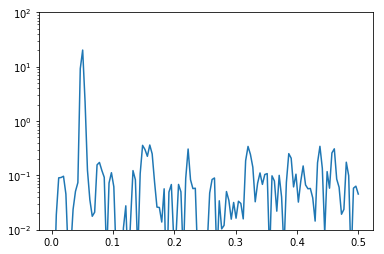

In [323]:
f, w = sig.welch(z)
plt.semilogy(f[1:], w[1:])
plt.ylim([1e-2, 1e2]);

## 10. High Pass Filter

Filter `x` with a high pass filter (cutoff = 0.75 of Nyquist) and plot a segment with asterisks and lines.

In [324]:
Length = 15
Order1 = Length - 1
Fs = 30
T = 5.0
n = 1024

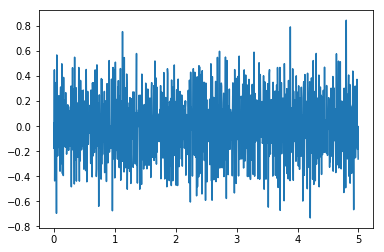

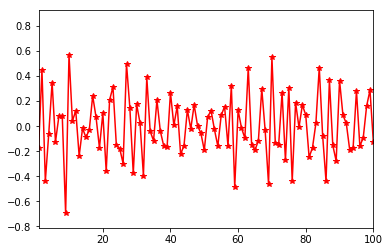

In [325]:
def highpass(Fs, Order1):
    Nyq1 = 0.5 * Fs
    Cutoff1 = 0.25 * Nyq1
    Norm_cutoff1 = Cutoff1/Nyq1
    b1, a1 =butter(Order1, Norm_cutoff1, btype = 'high', analog = False)
    return b1,a1
def butter_highpass(data1, Fs, Order1):
    b1, a1 = highpass(Fs, Order1)
    y1 = lfilter(b1, a1, data1)
    return y1

t1 = np.linspace(0, T, n, endpoint = False)
y1 =butter_highpass(x1, Fs, Order1)

plt.plot(t1,y1)
plt.show();
plt.plot(y1,'r*-')
plt.xlim(1,100)
plt.show();

## 11. Spectrum and Filter Response

Repeat step 7 for the high pass signal.  Plot both the spectrum estimate and filter response on the same plot (with a log scale on the Y-axis).  Both curves should be close together.